In [2]:
import matplotlib.pyplot as plt
import numpy as np
import getstock as gs
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

apikey = "E4064FN6TOZL073U"

In [3]:
# get stock monthly data for luxury industry
#Prada, LV, Hermes
stock_symbol_Prada = "PRDSY"
stock_data_Prada = gs.getMonthlyStockPrices(stock_symbol_Prada, apikey)

stock_symbol_LV = "LVMUY"
stock_data_LV = gs.getMonthlyStockPrices(stock_symbol_LV, apikey)

stock_symbol_Hermes = "HESAY"
stock_data_Hermes = gs.getMonthlyStockPrices(stock_symbol_Hermes, apikey)

In [12]:
# trim the data to year 2019
stock_trimmed_Prada = stock_data_Prada['2019']
stock_trimmed_LV = stock_data_LV['2019']
stock_trimmed_Hermes = stock_data_Hermes['2019']

In [5]:
# calc returns with dividends
stock_returns_Prada = (stock_trimmed_Prada.open - stock_trimmed_Prada.open.shift(1) 
                       + stock_trimmed_Prada.dividend_amt) / stock_trimmed_Prada.open.shift(1)

stock_returns_LV = (stock_trimmed_LV.open - stock_trimmed_LV.open.shift(1) 
                       + stock_trimmed_LV.dividend_amt) / stock_trimmed_LV.open.shift(1)

stock_returns_hermes = (stock_trimmed_Hermes.open - stock_trimmed_Hermes.open.shift(1) 
                       + stock_trimmed_Hermes.dividend_amt) / stock_trimmed_Hermes.open.shift(1)

In [6]:
# clean up our N/As in first period
stock_returns_Prada = stock_returns_Prada.dropna()
stock_returns_LV = stock_returns_LV.dropna()
stock_returns_hermes = stock_returns_hermes.dropna()

In [7]:
# find average stock return
stock_returns_Prada_avg = stock_returns_Prada.mean()
print("Prada average stock return in 2019: ", stock_returns_Prada_avg)
stock_returns_LV_avg = stock_returns_LV.mean()
print("LV average stock return in 2019: ", stock_returns_LV_avg)
stock_returns_hermes_avg = stock_returns_hermes.mean()
print("Hermes average stock return in 2019: ", stock_returns_hermes_avg)
print("After comparison, we can see that LV has the highest average stock return in 2019, so we choose LV as the representative of luxury industry in portfolio.")

Prada average stock return in 2019:  0.015744805426976028
LV average stock return in 2019:  0.0437422782407279
Hermes average stock return in 2019:  0.030051734948661615
After comparison, we can see that LV has the highest average stock return in 2019, so we choose LV as the representative of luxury industry in portfolio.


In [26]:
ups = pd.DataFrame(gs.getDailyStockPrices("UPS", apikey))
facebook = pd.DataFrame(gs.getDailyStockPrices("FB", apikey))
target = pd.DataFrame(gs.getDailyStockPrices("TGT", apikey))
pepsi = pd.DataFrame(gs.getDailyStockPrices("PEP", apikey))
lv = pd.DataFrame(gs.getDailyStockPrices("LVMUY", apikey))

In [27]:
ups = ups['2019']
facebook = facebook['2019']
target = target['2019']
pepsi = pepsi['2019']
lv = lv['2019']

In [28]:
stock_returns_ups = (ups.open - ups.open.shift(1) 
                       + ups.dividend_amt) / ups.open.shift(1)

stock_returns_facebook = (facebook.open - facebook.open.shift(1) 
                       + facebook.dividend_amt) / facebook.open.shift(1)

stock_returns_target = (target.open - target.open.shift(1) 
                       + target.dividend_amt) / target.open.shift(1)
stock_returns_pepsi = (pepsi.open - pepsi.open.shift(1) 
                       + pepsi.dividend_amt) / pepsi.open.shift(1)
stock_returns_lv = (lv.open - lv.open.shift(1) 
                       + lv.dividend_amt) / lv.open.shift(1)

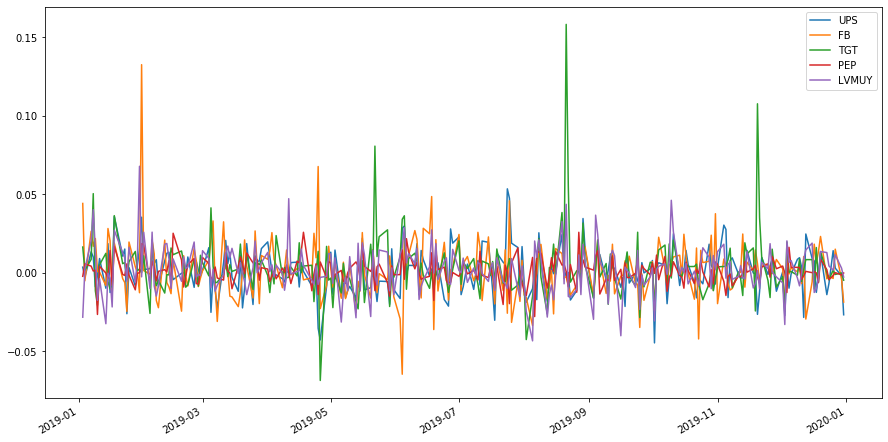

In [29]:
port_positions = pd.concat([stock_returns_ups, stock_returns_facebook, stock_returns_target, stock_returns_pepsi, stock_returns_lv], axis=1)
port_positions.columns = ['UPS', 'FB', 'TGT', 'PEP', 'LVMUY']
_ = port_positions.plot(figsize=(15, 8))

In [30]:
ups = pd.DataFrame(gs.getMonthlyStockPrices("UPS", apikey)['2019'])
facebook = pd.DataFrame(gs.getMonthlyStockPrices("FB", apikey)['2019'])
target = pd.DataFrame(gs.getMonthlyStockPrices("TGT", apikey)['2019'])
pepsi = pd.DataFrame(gs.getMonthlyStockPrices("PEP", apikey)['2019'])
lv = pd.DataFrame(gs.getMonthlyStockPrices("LVMUY", apikey)['2019'])

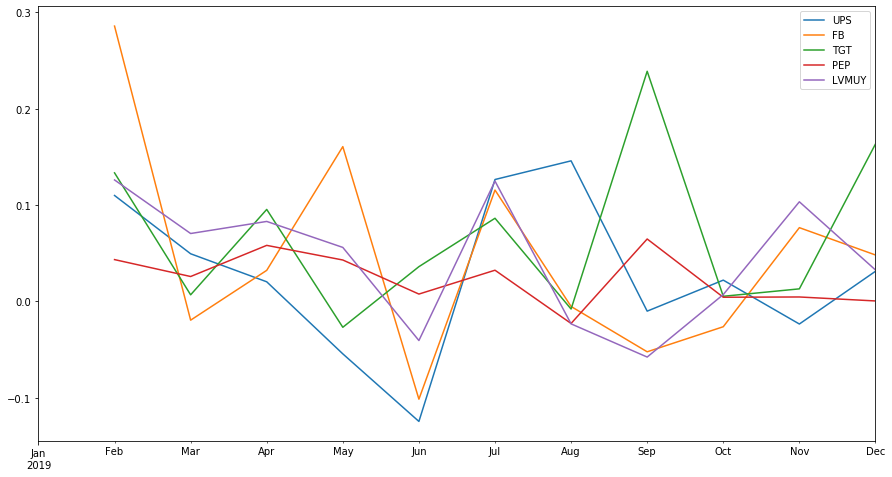

In [31]:
stock_returns_ups = (ups.open - ups.open.shift(1) 
                       + ups.dividend_amt) / ups.open.shift(1)

stock_returns_facebook = (facebook.open - facebook.open.shift(1) 
                       + facebook.dividend_amt) / facebook.open.shift(1)

stock_returns_target = (target.open - target.open.shift(1) 
                       + target.dividend_amt) / target.open.shift(1)
stock_returns_pepsi = (pepsi.open - pepsi.open.shift(1) 
                       + pepsi.dividend_amt) / pepsi.open.shift(1)
stock_returns_lv = (lv.open - lv.open.shift(1) 
                       + lv.dividend_amt) / lv.open.shift(1)

port_positions = pd.concat([stock_returns_ups, stock_returns_facebook, stock_returns_target, stock_returns_pepsi, stock_returns_lv], axis=1)
port_positions.columns = ['UPS', 'FB', 'TGT', 'PEP', 'LVMUY']
_ = port_positions.plot(figsize=(15, 8))